In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('input_main.csv')

In [3]:
df.head()

,Unnamed: 0,DEPTH,DT,GR,NPHI,RD,RHOB,ROP5_RM,RS,RT,BVW,KLOGH,PHIF,SW,VCL,pp_psi
0,0,3127.7052,87.701897,28.952101,0.2170,38.960499,2.2082,6.3016,95.438400,130.219100,0.0195,733.528686,0.2483,0.0785,0.1245,4641.506076
1,1,3127.8576,87.051201,29.013000,0.2168,40.557701,2.2143,6.3473,103.421096,127.670898,0.0196,695.894897,0.2461,0.0797,0.1251,4641.825160
2,2,3128.0100,87.711700,29.101200,0.2166,42.197201,2.2200,6.3964,110.710601,125.064598,0.0197,658.749694,0.2441,0.0809,0.1260,4642.428943
3,3,3128.1624,87.745697,29.576700,0.2178,44.440498,2.2200,6.4939,108.128898,121.629501,0.0200,604.472290,0.2445,0.0818,0.1305,4643.317427
4,4,3128.3148,88.152100,30.052200,0.2190,46.683899,2.2200,6.5915,105.547302,118.194396,0.0203,554.666870,0.2450,0.0827,0.1351,4644.490611


In [4]:
# selecting features and label
X = df.iloc[:, 1:-1]  # features
y = df.iloc[:,-1]  # label
X.shape, y.shape

((1811, 14), (1811,))

In [5]:
X.head()

,DEPTH,DT,GR,NPHI,RD,RHOB,ROP5_RM,RS,RT,BVW,KLOGH,PHIF,SW,VCL
0,3127.7052,87.701897,28.952101,0.2170,38.960499,2.2082,6.3016,95.438400,130.219100,0.0195,733.528686,0.2483,0.0785,0.1245
1,3127.8576,87.051201,29.013000,0.2168,40.557701,2.2143,6.3473,103.421096,127.670898,0.0196,695.894897,0.2461,0.0797,0.1251
2,3128.0100,87.711700,29.101200,0.2166,42.197201,2.2200,6.3964,110.710601,125.064598,0.0197,658.749694,0.2441,0.0809,0.1260
3,3128.1624,87.745697,29.576700,0.2178,44.440498,2.2200,6.4939,108.128898,121.629501,0.0200,604.472290,0.2445,0.0818,0.1305
4,3128.3148,88.152100,30.052200,0.2190,46.683899,2.2200,6.5915,105.547302,118.194396,0.0203,554.666870,0.2450,0.0827,0.1351


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [9]:
def convert(seconds):
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
    return "%d:%02d:%02d" % (hour, minutes, seconds)

max_iter:int, default=200

In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import time


In [11]:
from sklearn.decomposition import PCA

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [13]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import time


mlp_regr = GridSearchCV(
    MLPRegressor(random_state=2),
    param_grid = {
    'max_iter':[2000,4000,6000,8000,
                ],
    'hidden_layer_sizes': [(50,30,10,5),(100,60,20,10),(70,40,10),],
    'activation': ['relu',],
    'solver': ['adam',],
    'alpha':[0.0001,],},
    cv=5,
    scoring=['neg_mean_squared_error', 'r2'],
    refit='r2',
    verbose=2,
)

start = time.time()

mlp_regr.fit(X_train_pca, y_train.ravel())

end = time.time()

print('run_time:', "{:.2f}".format(end - start), 'seconds')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 30, 10, 5), max_iter=2000, solver=adam; total time=  22.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 30, 10, 5), max_iter=2000, solver=adam; total time=  24.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 30, 10, 5), max_iter=2000, solver=adam; total time=  24.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 30, 10, 5), max_iter=2000, solver=adam; total time=  21.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 30, 10, 5), max_iter=2000, solver=adam; total time=  15.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 30, 10, 5), max_iter=4000, solver=adam; total time=  19.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 30, 10, 5), max_iter=4000, solver=adam; total time=  23.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 30, 10, 5), ma

In [14]:

best_parameters = pd.DataFrame([mlp_regr.best_params_])

# Save the results to an Excel file
#best_parameters.to_excel('./output/mlp_regressor/best_parameters_mlp_RCV.xlsx', index=True)

# Display the results
print(best_parameters)

  activation   alpha hidden_layer_sizes  max_iter solver
0       relu  0.0001       (70, 40, 10)      2000   adam


In [15]:
import os

# Create the output/cnn directory if it doesn't exist
output_dir = "./output/NEW_mlp_regressor_pca_10"
os.makedirs(output_dir, exist_ok=True)

In [16]:
mlp_regr.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (70, 40, 10),
 'max_iter': 2000,
 'solver': 'adam'}

In [17]:
pred_1 = mlp_regr.predict(X_train_pca) # prediction for training set
pred_2 = mlp_regr.predict(X_test_pca)

In [18]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import max_error

train_r2 = r2_score(y_train,pred_1) # r2_score for training set
train_mae = mean_absolute_error(y_train, pred_1) # mean absolute error for training set
train_mse = mean_squared_error(y_train, pred_1) # mean squared error for training set
train_mape = mean_absolute_percentage_error(y_train, pred_1) # mean_absolute_percentage_error for training set 
train_maxE = max_error(y_train, pred_1)
train_minE = min(abs(y_train - pred_1))

test_r2 = r2_score(y_test, pred_2) # r2_score for testing set
test_mae = mean_absolute_error(y_test, pred_2) # mean absolute error for testing set
test_mse = mean_squared_error(y_test, pred_2) # mean squared error for testing set
test_mape = mean_absolute_percentage_error(y_test, pred_2) # mean_absolute_percentage_error for testing set

test_maxE = max_error(y_test, pred_2)
test_minE = min(abs(y_test - pred_2))


metrics = {
'performance_metrics': ['R2', 'MAE', 'MSE', 'MAPE', 'maxE', 'minE'],
'training': [train_r2, train_mae, train_mse,train_mape,train_maxE, train_minE],
'testing': [test_r2, test_mae, test_mse,test_mape, test_maxE, test_minE]
}

performance_metrics = pd.DataFrame(metrics)
performance = performance_metrics.transpose()
performance.to_csv('./output/NEW_mlp_regressor_pca_10/performance_result_metrices_GCV.csv')
performance

,0,1,2,3,4,5
performance_metrics,R2,MAE,MSE,MAPE,maxE,minE
training,0.970702,22.495722,972.248416,0.004702,226.80575,0.016595
testing,0.935026,30.742288,2184.54745,0.006408,371.728498,0.015231


In [19]:
performance

,0,1,2,3,4,5
performance_metrics,R2,MAE,MSE,MAPE,maxE,minE
training,0.970702,22.495722,972.248416,0.004702,226.80575,0.016595
testing,0.935026,30.742288,2184.54745,0.006408,371.728498,0.015231


In [20]:
a = np.stack([y_train, pred_1], axis=1) # training
a = pd.DataFrame(a, columns=['y_train', 'y_train_pred'])

b = np.stack([y_test, pred_2], axis=1) # testing 
b = pd.DataFrame(b, columns=['y_test', 'y_test_pred'])

with pd.ExcelWriter("./output/NEW_mlp_regressor_pca_10/predicted_mlp_model_GCV.xlsx") as writer:
    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    a.to_excel(writer, sheet_name="training", index=True)
    b.to_excel(writer, sheet_name="testing", index=True)

In [21]:
df = pd.DataFrame((mlp_regr).cv_results_)
# getting all parameter combinations and their performance result
result = df[['param_hidden_layer_sizes','param_solver',
            'mean_test_r2', 'mean_test_neg_mean_squared_error']]
result.to_csv('./output/NEW_mlp_regressor_pca_10/performance_result_for_mlp_regressor_gCV.csv')


In [22]:
print(mlp_regr.best_params_)

# the best performing score
print(mlp_regr.best_score_)

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (70, 40, 10), 'max_iter': 2000, 'solver': 'adam'}
0.8649122190622986


In [23]:

best_parameters = pd.DataFrame([mlp_regr.best_params_])

# Save the results to an Excel file
best_parameters.to_excel('./output/NEW_mlp_regressor_pca_10/best_parameters_mlp_GCV.xlsx', index=True)

# Display the results
print(best_parameters)

  activation   alpha hidden_layer_sizes  max_iter solver
0       relu  0.0001       (70, 40, 10)      2000   adam


In [24]:
performance

,0,1,2,3,4,5
performance_metrics,R2,MAE,MSE,MAPE,maxE,minE
training,0.970702,22.495722,972.248416,0.004702,226.80575,0.016595
testing,0.935026,30.742288,2184.54745,0.006408,371.728498,0.015231


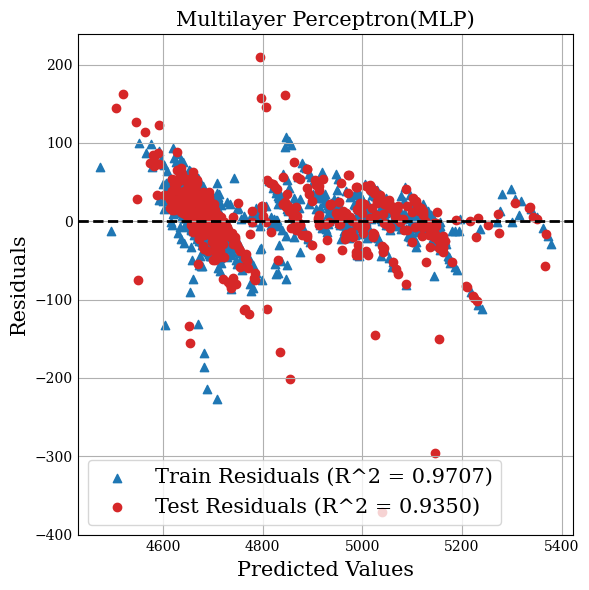

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Set the default font family for the entire plot
plt.rcParams['font.family'] = 'serif'  # Change 'serif' to the desired font name

train_residuals = y_train - pred_1
test_residuals = y_test - pred_2

fig, ax = plt.subplots(figsize=(6, 6))

# Scatter plot for training residuals with outline marker
ax.scatter(pred_1, train_residuals, c='tab:blue', label=f'Train Residuals (R^2 = {train_r2:.4f})', marker="^", edgecolors='tab:blue', facecolors='none')

# Scatter plot for test residuals with outline marker
ax.scatter(pred_2, test_residuals, c='tab:red', label=f'Test Residuals (R^2 = {test_r2:.4f})', marker='o', edgecolors='tab:red', facecolors='none')

# Horizontal line at y=0
ax.axhline(y=0, color='black', linestyle='--', linewidth=2)

# Set larger font sizes for x and y labels
ax.set_xlabel('Predicted Values', fontsize=15, labelpad=5)  # Adjust labelpad as needed
ax.set_ylabel('Residuals', fontsize=15)

ax.set_title('Multilayer Perceptron(MLP)', fontsize=15)

ax.grid(True)

# Set legend font size
ax.legend(fontsize=15)


ax.tick_params(axis='both', which='both', length=0)


plt.savefig('./output/NEW_mlp_regressor_pca_10/residual_plot.png', dpi=300)
plt.tight_layout()


In [26]:
#from sklearn.externals import joblib
from joblib import dump, load
dump(mlp_regr, './output/mlp_regressor_pca_4/trained_mlp_regressor.joblib')


['./output/mlp_regressor_pca_4/trained_mlp_regressor.joblib']